## Richardson-Gaudin Model Integral Analysis

The **Richardson-Gaudin model** is an exactly solvable model for systems with pairing interactions. The Hamiltonian is defined by:

$$
H = \sum_{i} \mu_i N_i - \sum_{i \neq j} J_{ij} P_i^\dagger P_j
$$

Where:

$$
\mu_i \quad \text{: energy level at site } i \text{ (also called single-particle levels)}
$$

$$
J_{ij} \quad \text{: pair interaction strength between sites } i \text{ and } j
$$

$$
P_i^\dagger, P_j \quad \text{: pair creation/annihilation operators}
$$

We represent the system in terms of **1-electron** and **2-electron integrals**, which are computed via the `HamRG` class.

---
In this notebook, we explore the Richardson-Gaudin model by calculating and visualizing one-electron and two-electron integrals for varying system sizes. The workflow includes:

- Generating energy level parameters.
- Calculating integrals for different numbers of particles.
- Analyzing properties like the mean and standard deviation of non-zero integral values.
- Plotting the resulting integrals using matplotlib.

This analysis helps to understand how the integrals behave as the system size changes.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from moha.hamiltonians import HamRG

# Function to calculate integrals for Richardson-Gaudin model
def calculate_rg_integrals(L, g):
    # Create energy levels (mu parameters)
    eps = np.linspace(-1, 1, L)
    
    # Create coupling matrix with strength g
    J_eq = g * np.ones((L, L))
    np.fill_diagonal(J_eq, 0)  # No self-interaction
    
    # Initialize the Richardson-Gaudin Hamiltonian
    rg_model = HamRG(mu=eps, J_eq=J_eq)
    
    # Generate the integrals
    one_electron = rg_model.generate_one_body_integral(dense=True)
    two_electron = rg_model.generate_two_body_integral(dense=True)
    
    # Return average values
    return np.mean(np.abs(one_electron)), np.mean(np.abs(two_electron))

### Understanding the Richardson-Gaudin Model Integrals

In this section, we delve into the computation and analysis of one-electron and two-electron integrals for the Richardson-Gaudin model. These integrals provide insights into the behavior of pairing interactions as the system size increases.

#### Key Variables and Parameters:
- **`L_values`**: A list of system sizes (number of energy levels) used for the analysis.
- **`g`**: Coupling strength parameter that determines the interaction strength between pairs.
- **`one_electron_integrals`**: Average absolute values of one-electron integrals for each system size.
- **`two_electron_integrals`**: Average absolute values of two-electron integrals for each system size.
- **`one_electron_means`**: Mean values of non-zero one-electron integrals.
- **`two_electron_means`**: Mean values of non-zero two-electron integrals.
- **`one_electron_stds`**: Standard deviations of non-zero one-electron integrals.
- **`two_electron_stds`**: Standard deviations of non-zero two-electron integrals.

#### Workflow Overview:
1. **Integral Calculation**: Using the `HamRG` class, we compute one-electron and two-electron integrals for varying system sizes (`L_values`).
2. **Data Analysis**: We analyze the mean of the integrals to understand their behavior.
3. **Visualization**: The results are visualized using matplotlib to highlight trends in the integral values as the system size increases.

This analysis provides a foundation for exploring more complex properties of the Richardson-Gaudin model in future studies.

In [15]:
# Parameters
L_values = [4, 6, 8, 10, 12]
g = 0.5  # Coupling strength

# Calculate integrals for different system sizes
one_electron_integrals = []
two_electron_integrals = []

for L in L_values:
    one, two = calculate_rg_integrals(L, g)
    one_electron_integrals.append(one)
    two_electron_integrals.append(two)
    print(f"L = {L}: 1-electron = {one:.6f}, 2-electron = {two:.6f}")


L = 4: 1-electron = 0.041667, 2-electron = 0.000732
L = 6: 1-electron = 0.025000, 2-electron = 0.000362
L = 8: 1-electron = 0.017857, 2-electron = 0.000214
L = 10: 1-electron = 0.013889, 2-electron = 0.000141
L = 12: 1-electron = 0.011364, 2-electron = 0.000099


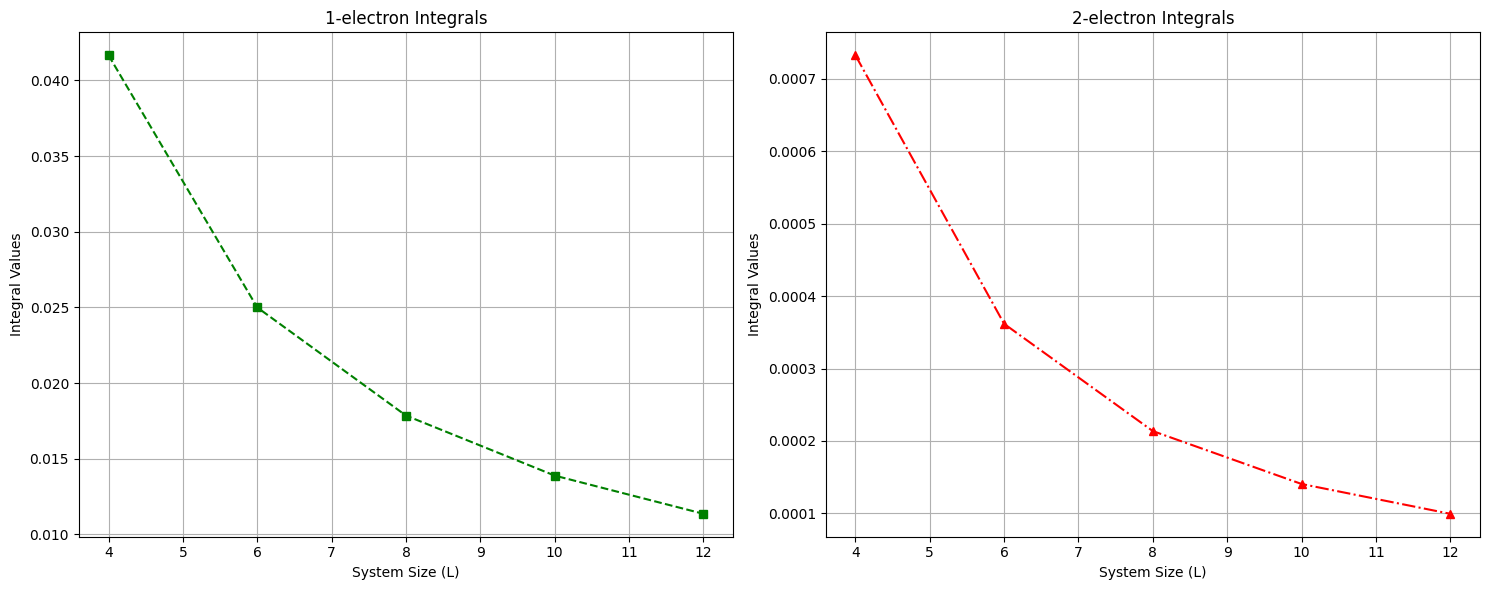

In [16]:
# Plotting the graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot one-electron integrals
ax1.plot(L_values, one_electron_integrals, marker='s', linestyle='--', color='green')
ax1.set_xlabel("System Size (L)")
ax1.set_ylabel("Integral Values")
ax1.set_title("1-electron Integrals")
ax1.grid(True)

# Plot two-electron integrals
ax2.plot(L_values, two_electron_integrals, marker='^', linestyle='-.', color='red')
ax2.set_xlabel("System Size (L)")
ax2.set_ylabel("Integral Values")
ax2.set_title("2-electron Integrals")
ax2.grid(True)

plt.tight_layout()
plt.show()

### Wavefunction Evolution Observations

We can conclude that:

- For large systems, the overlap 
    $$
    |\langle \Psi(0) | \Psi(g) \rangle| \to 0
    $$
    indicating that the wavefunction evolves significantly as the interaction strength increases.

This highlights the sensitivity of the Richardson-Gaudin model to changes in coupling strength, particularly in larger systems.

---
### Conclusion

The analysis of the Richardson-Gaudin model integrals provides valuable insights into the behavior of one-electron and two-electron interactions as the system size increases. Key observations include:

1. **One-Electron Integrals**:
    - The average absolute values of one-electron integrals systematically decrease with increasing system size, reflecting the diminishing influence of individual energy levels.

2. **Two-Electron Integrals**:
    - The average absolute values of two-electron integrals decrease with system size, reflecting the scaling of interaction strengths with increasing system size.